# Check IDL redux for DEIMOS fluxing

In [64]:
# imports
from importlib import reload
import numpy as np
from matplotlib import pyplot as plt

from astropy.io import fits
from astropy.table import Table
from astropy import units

from pypeit import specobjs, specobj
from pypeit.core import wave

from linetools import utils as ltu

# Load up

## IDL spectrum (from Carlos)

In [2]:
hdul = fits.open('2017may28_d0528_0088.fits')
idl_spec = Table(hdul[2].data)

In [3]:
idl_spec[0:5]

WAVELENGTH,COUNTS
float32,float32
6645.35,1319.899
6645.6797,1331.5624
6646.01,1335.19
6646.34,1334.5024
6646.67,1331.7793


In [93]:
npix = int(len(idl_spec)/2)
npix

4094

In [4]:
idl_vac = wave.airtovac(idl_spec['WAVELENGTH']*units.AA)

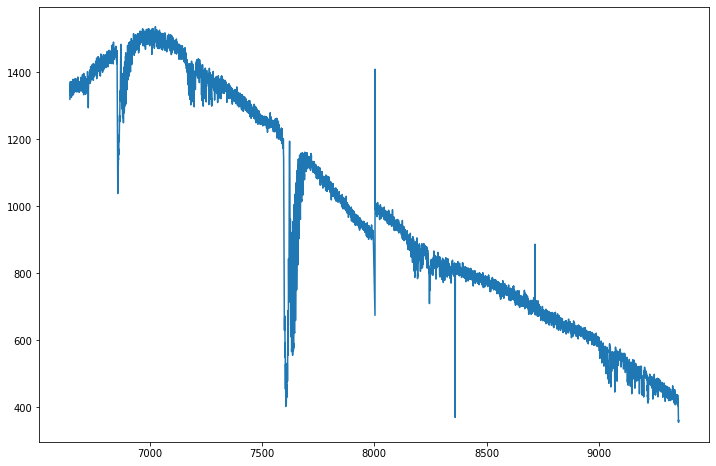

In [12]:
fig = plt.figure(figsize=(12,8))
ax = plt.gca()
ax.plot(idl_spec['WAVELENGTH'], idl_spec['COUNTS'])
plt.show()

In [45]:
meta = Table(hdul[1].data)
meta

OBSERVATORY,INSTRUMENT,DATE,GRATING,GRATEPOS,CENTRAL_WAVE,BLOCKING,AIRMASS,SPEC_BIN,SLIT_WIDTH,STD_NAME,RA,DEC,CONDITIONS,FILENAME,FRAME,PROGRAM,VERSION
str4,str6,str9,str5,int16,float32,str5,float32,int16,float32,str11,str11,str11,str1,str62,int32,str17,str3
Keck,DEIMOS,28MAY2017,1200G,4,7999.9863,OG550,1.0688188,1,99.0,BD +28 4211,21:51:11.02,+28:51:50.4,,/KVSPCAdata/Throughput/toProcess/raw/2017may28/d0528_0088.fits,88,deimos_throughput,0.1


In [48]:
float(meta['AIRMASS'])

1.0688188076019287

## Some random DEIMOS spectrum

### 1200G_M_7750

In [5]:
spec1d_file = '/scratch/PypeIt-development-suite/REDUX_OUT/keck_deimos/1200G_M_7750/Science/spec1d_DE.20170425.50487-dra11_DEIMOS_20170425T140121.014.fits'

In [6]:
sobjs = specobjs.SpecObjs.from_fitsfile(spec1d_file)

In [7]:
sobjs.NAME

array(['SPAT0036-SLIT0034-DET07', 'SPAT0097-SLIT0091-DET07',
       'SPAT0139-SLIT0139-DET07', 'SPAT0185-SLIT0183-DET07',
       'SPAT0229-SLIT0241-DET07', 'SPAT0329-SLIT0311-DET07',
       'SPAT0363-SLIT0365-DET07', 'SPAT0410-SLIT0410-DET07',
       'SPAT0464-SLIT0461-DET07', 'SPAT0514-SLIT0513-DET07',
       'SPAT0570-SLIT0574-DET07', 'SPAT0650-SLIT0645-DET07',
       'SPAT0714-SLIT0709-DET07', 'SPAT0759-SLIT0758-DET07',
       'SPAT0802-SLIT0813-DET07', 'SPAT0895-SLIT0894-DET07',
       'SPAT0991-SLIT0975-DET07', 'SPAT1033-SLIT1037-DET07',
       'SPAT1100-SLIT1110-DET07', 'SPAT1218-SLIT1199-DET07',
       'SPAT1271-SLIT1269-DET07', 'SPAT1329-SLIT1323-DET07',
       'SPAT1375-SLIT1372-DET07', 'SPAT1413-SLIT1424-DET07',
       'SPAT1501-SLIT1486-DET07', 'SPAT1541-SLIT1548-DET07',
       'SPAT1617-SLIT1607-DET07', 'SPAT1674-SLIT1675-DET07',
       'SPAT1746-SLIT1746-DET07', 'SPAT1823-SLIT1813-DET07',
       'SPAT1862-SLIT1861-DET07', 'SPAT1901-SLIT1904-DET07',
       'SPAT1957-SLIT195

In [8]:
i_sobj = np.where(sobjs.NAME == 'SPAT0570-SLIT0574-DET07')[0][0]
i_sobj

10

In [9]:
sobj = sobjs[i_sobj]
sobj

<SpecObj:  items={'TRACE_SPAT': True, 'FWHM': True, 'FWHMFIT': True, 'OPT_WAVE': True, 'OPT_FLAM': False, 'OPT_FLAM_SIG': False, 'OPT_FLAM_IVAR': False, 'OPT_COUNTS': True, 'OPT_COUNTS_IVAR': True, 'OPT_COUNTS_SIG': True, 'OPT_COUNTS_NIVAR': True, 'OPT_MASK': True, 'OPT_COUNTS_SKY': True, 'OPT_COUNTS_RN': True, 'OPT_FRAC_USE': True, 'OPT_CHI2': True, 'BOX_NPIX': True, 'BOX_WAVE': True, 'BOX_FLAM': False, 'BOX_FLAM_SIG': False, 'BOX_FLAM_IVAR': False, 'BOX_COUNTS': True, 'BOX_COUNTS_IVAR': True, 'BOX_COUNTS_SIG': True, 'BOX_COUNTS_NIVAR': True, 'BOX_MASK': True, 'BOX_COUNTS_SKY': True, 'BOX_COUNTS_RN': True, 'BOX_FRAC_USE': False, 'BOX_CHI2': False, 'BOX_RADIUS': True, 'FLEX_SHIFT_GLOBAL': True, 'FLEX_SHIFT_LOCAL': True, 'FLEX_SHIFT_TOTAL': True, 'VEL_TYPE': True, 'VEL_CORR': True, 'DET': 7, 'DETECTOR': True, 'PYPELINE': True, 'OBJTYPE': True, 'SPAT_PIXPOS': 570.0144511535764, 'SPAT_FRACPOS': True, 'trace_spec': True, 'maskwidth': True, 'WAVE_RMS': True, 'SLITID': 574, 'OBJID': True, 'N

# Plot em

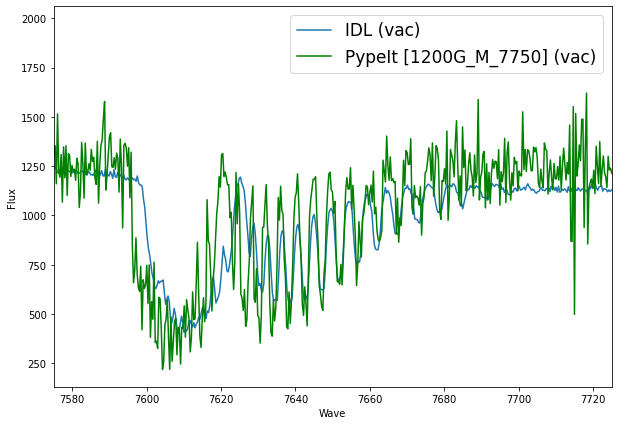

In [10]:
fig = plt.figure(figsize=(10,7))
ax = plt.gca()
# IDL
#ax.plot(idl_spec['WAVELENGTH'], idl_spec['COUNTS'], label='IDL (air)')
ax.plot(idl_vac, idl_spec['COUNTS'], label='IDL (vac)')
# PypeIt
scl = 1.8
ax.plot(sobj.OPT_WAVE, sobj.OPT_COUNTS*scl, label='PypeIt [1200G_M_7750] (vac)', color='green')
#
ax.set_xlabel('Wave')
ax.set_ylabel('Flux')
ax.set_xlim(7575., 7725.)
ax.legend(fontsize=17.)
plt.savefig('telluric_comparison.png', dpi=400)
plt.show()

----

# Generate a SpecObjs object

## First a specobj

In [118]:
reload(specobj)
sobj1 = specobj.SpecObj.from_arrays('MultiSlit', idl_vac.value[0:npix],
                                  idl_spec['COUNTS'].data[0:npix], 
                                   1./(idl_spec['COUNTS'].data[0:npix]),
                                   DET=3)
sobj2 = specobj.SpecObj.from_arrays('MultiSlit', idl_vac.value[npix:],
                                  idl_spec['COUNTS'].data[npix:], 
                                   1./(idl_spec['COUNTS'].data[npix:]), 
                                   DET=7)

In [119]:
sobj1

<SpecObj:  items={OPT_WAVE: True
OPT_COUNTS: True
OPT_COUNTS_IVAR: True
OPT_MASK: True
FLEX_SHIFT_GLOBAL: True
FLEX_SHIFT_LOCAL: True
FLEX_SHIFT_TOTAL: True
DET: 3
PYPELINE: True
OBJTYPE: True
SLITID: 0
NAME: SPAT-----SLIT0000-DET03
hand_extract_flag: True
>

## Now a SpecObjs

In [120]:
reload(specobjs)
sobjs = specobjs.SpecObjs()
sobjs.add_sobj(sobj1)
sobjs.add_sobj(sobj2)

In [121]:
coord = ltu.radec_to_coord((meta['RA'][0], meta['DEC'][0]))
coord

<SkyCoord (ICRS): (ra, dec) in deg
    (327.79591667, 28.864)>

In [125]:
sobjs.header = dict(EXPTIME=1., AIRMASS=float(meta['AIRMASS']),
                    DISPNAME=str(meta['GRATING'][0]), 
                    PYP_SPEC='keck_deimos',
                    RA=coord.ra.deg, DEC=coord.dec.deg
                   )

In [126]:
sobjs.ready_for_fluxing()

True

### Write

In [127]:
sobjs.write_to_fits(sobjs.header, 'spec1d_tst_spec.fits')

[INFO]    :: specobjs.py 675 write_to_fits() - Wrote 1D spectra to spec1d_tst_spec.fits


## Read and check

In [116]:
sobjs2 = specobjs.SpecObjs.from_fitsfile('spec1d_tst_spec.fits')

In [117]:
sobjs2.ready_for_fluxing()

True

# Running

    pypeit_sensfunc spec1d_tst_spec.fits --algorithm IR --multi 3,7 --debug